## Problem set 2

Answer notebook - __Luís Teles Morais__

Do the folowing exercises from Week 1 lecture notebooks: 

- Numerical: Exercises 4-7

### Exercise 4

- First, define the derivative approximation function. This function takes three arguments: 1) a function, 2) $x_0$ and 3) precision $h= x-x_0$. The derivative approximation function is given by: $f'(x_0)= \frac{f(x_0+h)-f(x_0)}{h}$

- Define the Newton-Rhapson algorithm. Then use it to find the price $p$ that clears demand $Q=1$. Use tolerance $10^{-15}$ and use maximum number of iteratrions 1000 and initial guess $x_0=1$. 

In [4]:
#Imports and demand functions from previous exercises

from numpy import *

import matplotlib.pyplot as plt

def qd(p):
    return 0.5*(p**-0.5) + 0.3*(p**-0.2) 

def xd(p):
    return 1-qd(p)

def d_qd(p):
    return -0.25*(p**-1.5) + -0.06*(p**-1.2) 

def fixedpalg(f,x0,tol,maxiter):
    def g(x):
        return x-f(x)
    x=x0
    while abs(g(x)) > 10**-tol:
        x = g(x)
    return x

In [5]:
#Define the derivative approx function:

def daf(f,x0,h):
    return (f(x0+h)-f(x0))/h

#Test:


print(daf(qd,4,.01))
print(daf(qd,4,.001))
print(daf(qd,4,.00001))
print(daf(qd,4,.000000001))
print(d_qd(4))

-0.042542381690602316
-0.04261031122565484
-0.04261779860126324
-0.04261790920168096
-0.042617874248827986


In [6]:
#Define the Newton-Rhapson algorithm:

def nrhapalg(f,x0,tol,maxiter):
    x=x0
    ite=0
    while abs(x-f(x)/daf(f,x,10**-tol)) > 10**-tol and ite <= maxiter:
        x = x-f(x)/daf(f,x,10**-tol)
        ite += 1
    return x

## Test:
#print(fixedpalg(xd,1,5,1800))
#print(nrhapalg(xd,1,5,1800))

##Result
print("\nThe price p is:",round(nrhapalg(xd,1,5,1500),2))


The price p is: 0.57


In [162]:
print("\nmu hat with Newton-Rhapson is:",nrhapalg((lambda mu: -lgauss(mu,1,len(data),data)),1,5,13)) ##Why not working? DAF evaluates well (see above)
def test(x):
    return -lgauss(mu,1,len(data),data)

daf(test,2,10**-5)


mu hat with Newton-Rhapson is: 61.690391541254705


0.0

### Exercise 5

- Assume that the tax revenue for a government is given by $R(t)= -t^2+t$, where $t$ is the taxe rate. Use the grid search method and find the tax rate on the $[0,1]$ domain that maximizes the tax revenue up to $10^{-4}$. 

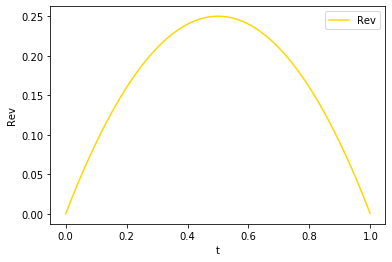

In [35]:
#Define (and plot) revenue function

def rev(t):
    return (-t**2)+t

x = arange(0,1,10**-3)
fig, ax1 = plt.subplots()
ax1.plot(x,rev(x),label="Rev",color='gold')
ax1.set_ylabel('Rev')
ax1.set_xlabel('t')
plt.legend()
plt.show()

In [36]:
# Option 1: using numpy argmax:

def maxsearch2d(f,l,u,precision):
    domain = arange(l,u+precision,precision)
    space = array([domain, [f(x) for x in domain]])
    return space[0][argmax(space[1])]

#Test
print(maxsearch2d(rev,0,1,10**-4))

0.5


### Exercise 6

- Import scipy.optimize as opt and use the minimize method to find the optimal savings allocation. In addition, report the optimal consumption in both periods. Use initial guess $x_0=0.1$. (Hint: read the minimize documentation using help to check the arguments of this method)

In [37]:
import scipy.optimize as opt
import sympy as sp

First lets transform this problem to an unconstrained one by substituting the constrains into the utility function:

$$ \max_{s} \frac{(y-s)^{1-\mu}}{1-\mu}+ \beta \frac{(y+Rs)^{1-\gamma}}{1-\gamma} $$


$\mu = 1.1$, 
$\beta = 0.95$, 
$\gamma = 1.2$, 
$R = 1.05$, 
$y = 10$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


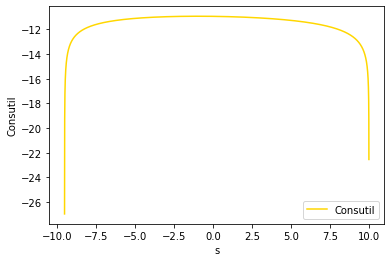

-0.9784374999999979
Optimal s:  -0.978
Optimal c1:  10.978
Optimal c2:  8.973


In [38]:
mu = 1.1
beta = 0.95
gamma = 1.2 
R = 1.05 
y = 10

def consutil(s):
    return ((y-s)**(1-mu))/(1-mu)+beta*((y+R*s)**(1-gamma))/(1-gamma)

x = arange(-100,100,10**-3)
fig, ax1 = plt.subplots()
ax1.plot(x,consutil(x),label="Consutil",color='gold')
ax1.set_ylabel('Consutil')
ax1.set_xlabel('s')
plt.legend()
plt.show()

s_opt = opt.minimize((lambda x: -consutil(x)),0.1,method='Nelder-Mead').x[0]

print(s_opt)

print("Optimal s: ", round(s_opt,3))

print("Optimal c1: ", round(y-s_opt,3))

print("Optimal c2: ", round(y+R*s_opt,3))

Consolidate the budget constraints by substituting away s and combine the first order conditions w.r.t. $c_1, c_2$ to get:

$$c_1^{-\mu}-\beta R c_2^{-\gamma} =0$$

$$c_1 + \frac{c_2}{R}-y -\frac{y}{R} =0  $$



### Exercise 7

- Build a function that returns an array with two elements, i.e. the residuals of the first order conditions for given $c_1, c_2$.

- Use the fsolve to get the optimal allocations, i.e. the ones that make the first order conditions zero.

In [39]:
def foc(c):
    res1 = (c[0]**-mu) - beta*R*(c[1]**-gamma)
    res2 = c[0] + (c[1]/R) - y - (y/R)
    return res1,res2

##Test
foc(array((2,3))) #Input should be array for fsolve to work. Output here is tuple.

(0.199604926483127, -14.666666666666666)

In [52]:
cons_sol = opt.fsolve(foc,array((1,10))) #Arguments of fsolve here are simply the function and an initial guess (also array).

print("The optimal allocation (c1,c2) is: ",cons_sol)

print("\n",type(cons_sol)) # Notice output is array.



The optimal allocation (c1,c2) is:  [10.97840723  8.97267241]

 <class 'numpy.ndarray'>


_Notice the optimal allocation is the same as in the previous exercise as expected._

In addition, do the following exercises:

#### 1. Gaussian Log-Likelihood Estimation

In [11]:
import numpy as np

# Lets define the Gaussian Log-likelihood function
def lgauss(mu, sigma, n, x):
    '''
    This function evaluates the gaussian log-likelihood given mu, sigma,
    number of observations, n, and a dataset, x.
    
    Returns: a scalar
    '''
    
    l = -n/2*np.log(2*np.pi*sigma**2) -1/(2*sigma**2)*(sum((x-mu)**2))
    return l

In [12]:
# Next, lets import data on housing prices in Boston
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data[:,0]

A. Evaluate the log-likelihood with mu=5, sigma=1 and with Boston data.

B. Given sigma, find $\mu$ that maximizes lgauss by minimizing -lgauss. (use `fmin` from `scipy.optimize`)

C. Now use the Newton-Rhapson Method you defined in exercise 4 of the numerical lecture notebook.

D. Estimate both $\mu$ and $\sigma$.

E. Plot the 3D log-likelihood function. (you should see a preety flat surface with a tiny peak) 

12000
12000


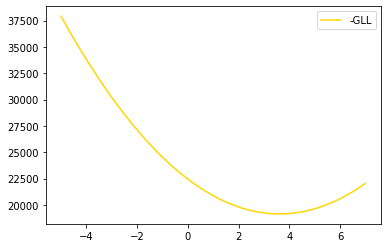

In [13]:
##Aux: plot

x = arange(-5,7,10**-3)
print(len(x))
print(len([-lgauss(mu,1,len(data),data) for mu in x]))

fig, ax1 = plt.subplots()
ax1.plot(x,[-lgauss(mu,1,len(data),data) for mu in x],label="-GLL",color='gold')
plt.legend()
plt.show()

In [14]:
##A.
print("n=",len(data))
lgauss(5,1,len(data),data)

n= 506


-19632.940075376966

In [15]:
##B.
print("\nmu hat is:",(opt.fmin((lambda x: -lgauss(x,1,len(data),data)),1)[0]))

Optimization terminated successfully.
         Current function value: 19146.593894
         Iterations: 19
         Function evaluations: 38

mu hat is: 3.613476562500005


12000
12000


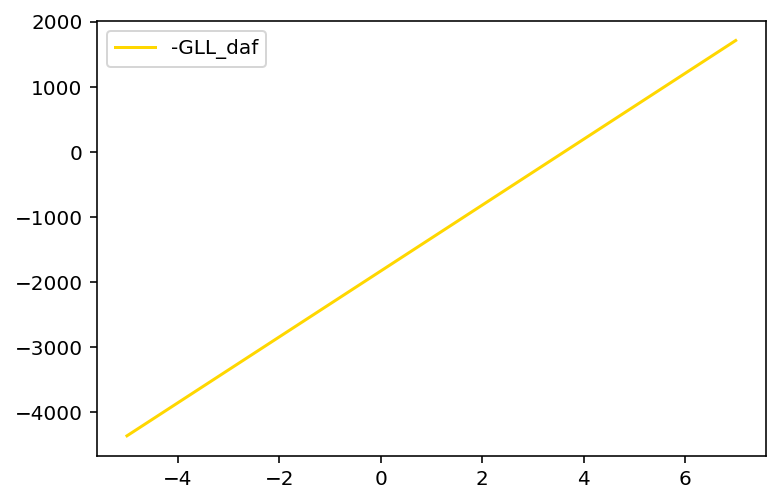

In [140]:
##Aux: plot

x = arange(-5,7,10**-3)
print(len(x))
print(len([-lgauss(mu,1,len(data),data) for mu in x]))

fig, ax1 = plt.subplots()
ax1.plot(x,[daf((lambda mu: -lgauss(mu,1,len(data),data)),x0,10**-5) for x0 in x],label="-GLL_daf",color='gold')
plt.legend()
plt.show()

In [142]:
## C.

print("\nmu hat with Newton-Rhapson is:",nrhapalg((lambda mu: -lgauss(mu,1,len(data),data)),1,5,1800)) ##Why not working? DAF evaluates well (see above)
print("\nmu hat is with Newton-Rhapson (fsolve) is:",(opt.fsolve((lambda x: -lgauss(x,1,len(data),data)),1)[0]))


mu hat with Newton-Rhapson is: -11.371485458591978

mu hat is with Newton-Rhapson (fsolve) is: 3.6138603969799123


In [124]:
## D.
def lgaussexD(x):
    mu = x[0]
    sigma = x[1]
    return -lgauss(mu,sigma,len(data),data)

print("\nmu hat is:",opt.minimize(lgaussexD,[1,10],method='Nelder-Mead').x[0])
print("\nand sigma hat is:",opt.minimize(lgaussexD,[10,10],method='Nelder-Mead').x[1])



mu hat is: 3.6135588894450503

and sigma hat is: 8.59306038078644


In [19]:
 
mu_ax = arange(-5,5,.1)
sig_ax = arange(-10,10,.1)
print(enumerate(mu_ax))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


(100, 100)

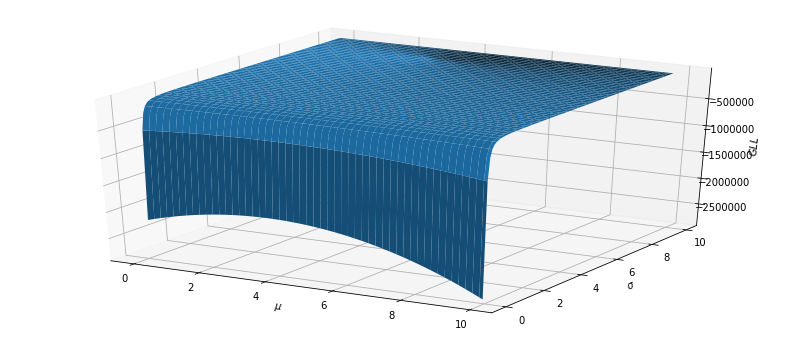

In [67]:
## E. Plot

from mpl_toolkits.mplot3d.axes3d import Axes3D

 
mu_ax = arange(0,10,.1)
sig_ax = arange(0,10,.1)
        
X, Y = meshgrid(mu_ax, sig_ax)

lgauss_mat = array([[lgauss(mu,sig,len(data),data) for mu in mu_ax] for sig in sig_ax])

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(projection='3d')
        
p = ax.plot_surface(X, Y, lgauss_mat)
        
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$GLL$')

shape(lgauss_mat)


In [ ]:
#Longer, less elegant but more transparent version

from mpl_toolkits.mplot3d.axes3d import Axes3D

 
mu_ax = arange(-5,5,.1)
sig_ax = arange(-10,10,.1)
        
X, Y = meshgrid(mu_ax, sig_ax)

lgauss_mat = zeros((len(mu_ax),len(sig_ax)))
for mu_i, mu in enumerate (mu_ax):
    for sig_i, sig in enumerate (sig_ax):
        lgauss_mat[mu_i,sig_i] = lgauss(mu,sig,len(data),data)

print(shape(sig_ax))
        
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(projection='3d')
        
p = ax.plot_surface(X, Y, lgauss_mat.T)
        
ax.set_xlabel('$K$')
ax.set_ylabel('$L$')
ax.set_zlabel('$Y$')

#### 2. Function Approximation

Let's approximate the following function:

$$ f(x) = \min (\sin(x), 0.7) $$

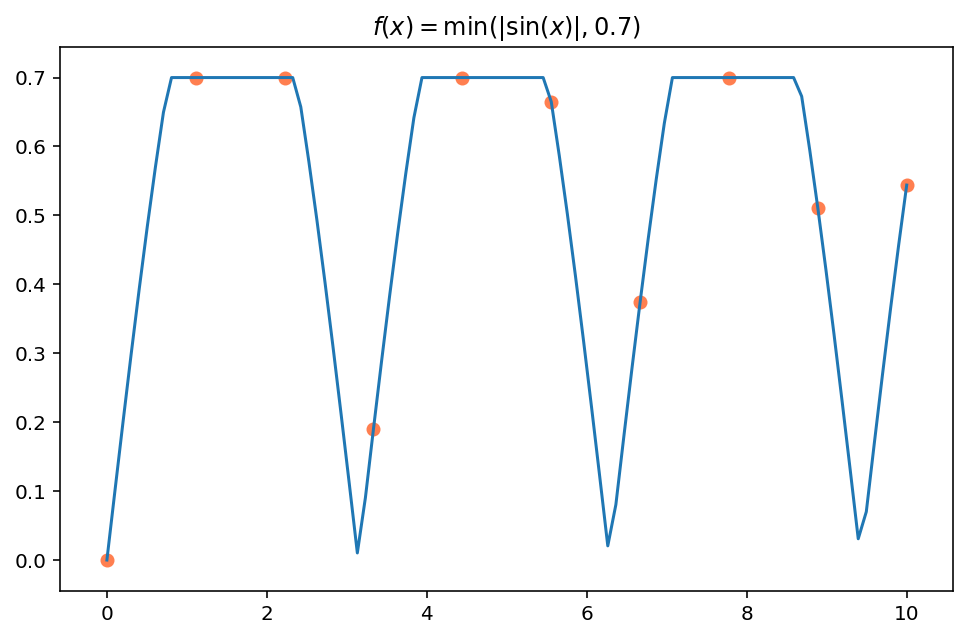

In [100]:
def fun(x):
    res = []
    for i in x:
        res.append(min(abs(np.sin(i)), 0.7))
    return res

x = np.linspace(0,10,100)
data_x = np.linspace(0,10,10) 

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (|\sin(x)|, 0.7)$') # r before the title string calls latex
plt.show()

A. Compute the linear interpolation approximation of the function and plot it.

B. Repeat with a cubic spline and with the Chebyshev polynomials (use 6). 

C. Define the approximation error.

D. Plot the approximation error for all three types of approximations in the same figure to compare them.

E. Which approximation delivers the lowest approximation error?

In [70]:
import scipy.interpolate as interp # Main interpolation library in Python
%matplotlib inline
%config InlineBackend.figure_format ='retina' # (Mac only). To get high resolution figures in notebook. 

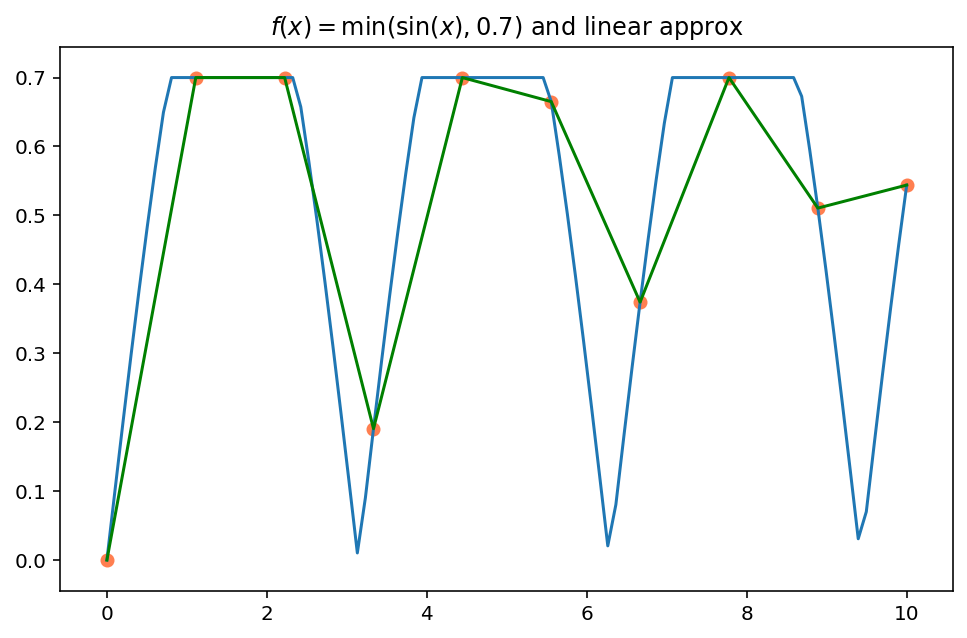

In [71]:
## A.

# Apply the linear interpolation given data points, x and y
fun_app_lin = interp.interp1d(data_x, fun(data_x), kind="linear") #output y_app is a _function_

# Compare the true function with the linear interpolation approximation of that function
plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.plot(x, fun_app_lin(x), c = 'green', label='linear approx')
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$ and linear approx') # r before the title string calls latex
plt.show()

In [86]:
## B.a
#Not useful: B-spline function.
#tck = interp.splrep(data_x, fun(data_x)) #Returns a tuple (t,c,k) containing the vector of knots, the B-spline coefficients, and the degree of the spline.
#def fun_app_spl(arg):
    #return interp.splev(arg, tck)
    
fun_app_spl = interp.CubicSpline(data_x, fun(data_x)) #Defines cubic spline function with arguments array x, array y


In [87]:
##B.b

cheb_co = np.polynomial.chebyshev.chebfit(data_x, fun(data_x), deg=6) #Chebyshev coefficients ordered from low to high. If y was 2-D, the coefficients for the data in column k of y are in column k.

def fun_app_che(arg):
    return np.polynomial.chebyshev.chebval(arg, cheb_co)

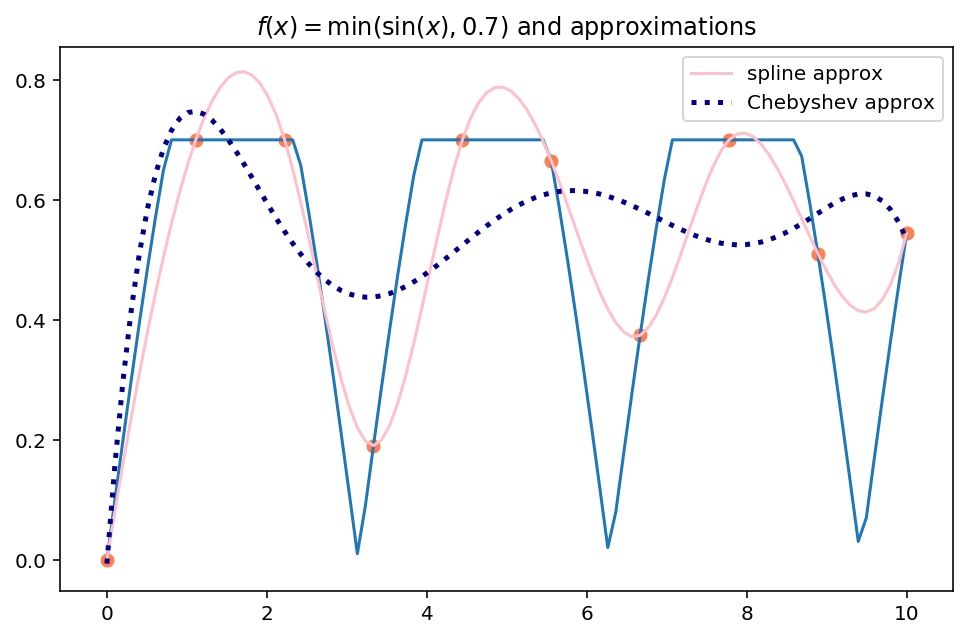

In [88]:
##B.plots

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.plot(x, fun_app_spl(x), c = 'pink', label='spline approx')
plt.plot(x, fun_app_che(x), c = 'darkblue', label='Chebyshev approx', linestyle=":",linewidth="2.5")
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$ and approximations') # r before the title string calls latex
plt.legend()
plt.show()

In [89]:
##C.

def approx_err(f1,arg):
    return abs(f1(arg)-fun(arg))
    

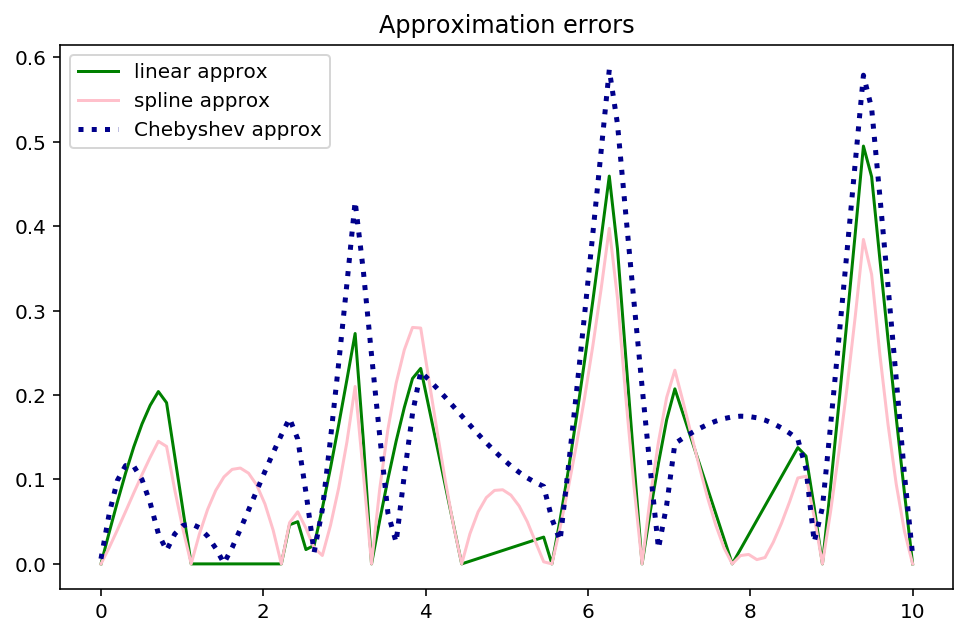

In [90]:
##D.
plt.figure(figsize=(8,5))
plt.plot(x, approx_err(fun_app_lin,x), c = 'green', label='linear approx')
plt.plot(x, approx_err(fun_app_spl,x), c = 'pink', label='spline approx')
plt.plot(x, approx_err(fun_app_che,x), c = 'darkblue', label='Chebyshev approx', linestyle=":",linewidth="2.5")
plt.title('Approximation errors') # r before the title string calls latex
plt.legend()
plt.show()

In [91]:
##E.
import scipy.integrate as integrate

print("Integral from 0 to 10 of the approximation error with:")
print("linear approx:",round(integrate.simps(approx_err(fun_app_lin,x)),3))
print("spline approx:",round(integrate.simps(approx_err(fun_app_spl,x)),3))
print("Chebyshev approx:",round(integrate.simps(approx_err(fun_app_che,x)),3))

Integral from 0 to 10 of the approximation error with:
linear approx: 11.268
spline approx: 10.561
Chebyshev approx: 16.777
